In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("EC_2017-2020Jew.csv")

C:\Users\UAE12\AppData\Local\Temp\ipykernel_23640\2095847079.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("EC_2017-2020Jew.csv")


In [4]:
df['year'] = pd.DatetimeIndex(df['consumption_periods']).year
df['month'] = pd.DatetimeIndex(df['consumption_periods']).month
df['day'] = pd.DatetimeIndex(df['consumption_periods']).day

In [5]:
df.head(3)

,Unnamed: 0.1,Unnamed: 0,community,rate_category,consumption_period,calendar_month,consumption_unit,billing_portion,consumption_periods,year,month,day
0,0,0,345.0,ENORATE,22.03.2017,201201,0.0,B28,2017-03-22,2017.0,3.0,22.0
1,1,1,345.0,ENORATE,22.03.2017,201202,0.0,B28,2017-03-22,2017.0,3.0,22.0
2,2,2,345.0,ENORATE,22.03.2017,201203,0.0,B28,2017-03-22,2017.0,3.0,22.0


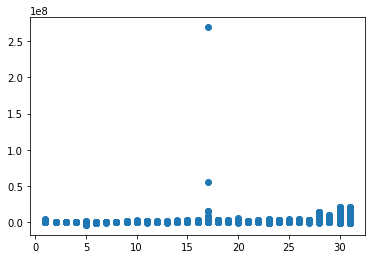

In [6]:
plt.scatter(df['day'], df['consumption_unit'])

                    sum
community              
111.0      1.244751e+08
112.0      3.185046e+08
113.0      3.997719e+08
114.0      3.138897e+08
115.0      1.917137e+08
...                 ...
967.0      7.835236e+06
971.0      1.228491e+07
981.0      7.786872e+06
987.0      3.018395e+05
991.0      6.452000e+07

[233 rows x 1 columns]


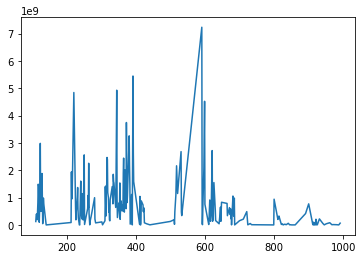

In [7]:
result1 = df.groupby("community")["consumption_unit"].aggregate(['sum'])
print(result1)
plt.plot(result1)

         median
month          
1.0    190.0530
2.0    181.8250
3.0    198.9240
4.0    338.0105
5.0    436.6600
6.0    545.3620
7.0    530.9180
8.0    550.6040
9.0    549.0090
10.0   498.2000
11.0   372.1500
12.0   278.3160


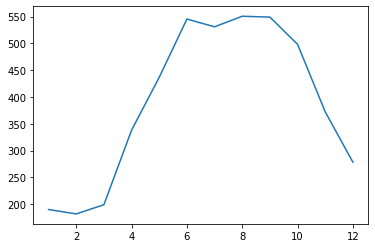

In [8]:
result2 = df.groupby("month")["consumption_unit"].aggregate(['median'])
print(result2)
plt.plot(result2)

                   median
rate_category            
COMMELEC         416.0150
ENORATE            0.0000
FREENRESIE        86.7270
FREERESIE          0.0000
GOVTELEC        3212.1845
INDTELEC       10718.4000
RESIEXPE         274.0200
RESINATE        2492.7520
RESINATSE       2881.8330


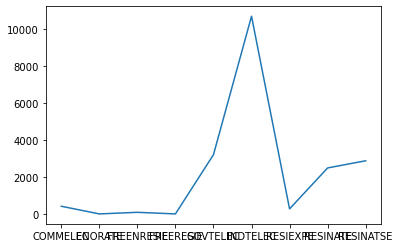

In [9]:
result3 = df.groupby('rate_category')['consumption_unit'].aggregate(['median'])
print(result3)
plt.plot(result3)

        median
day           
1.0   100.0000
2.0   122.9040
3.0    94.5890
4.0    96.4400
5.0    97.7200
6.0   119.1640
7.0   170.2380
8.0   207.2100
9.0   260.0800
10.0  320.2800
11.0  403.5800
12.0  439.3350
13.0  415.5160
14.0  480.7860
15.0  472.7380
16.0  447.2400
17.0  382.6900
18.0  654.5300
19.0  511.7000
20.0  553.4295
21.0  370.4220
22.0  402.0000
23.0  470.0000
24.0  426.1500
25.0  294.6480
26.0  342.3540
27.0  303.8590
28.0  234.1820
29.0  281.7710
30.0  337.7100
31.0  331.3220


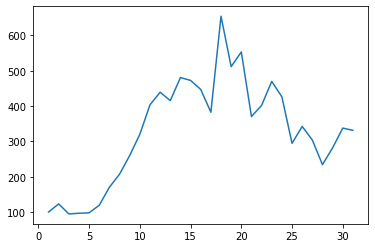

In [10]:
result4 = df.groupby('day')['consumption_unit'].aggregate(['median'])
print(result4)
plt.plot(result4)

Text(0.5, 1.0, 'Day')

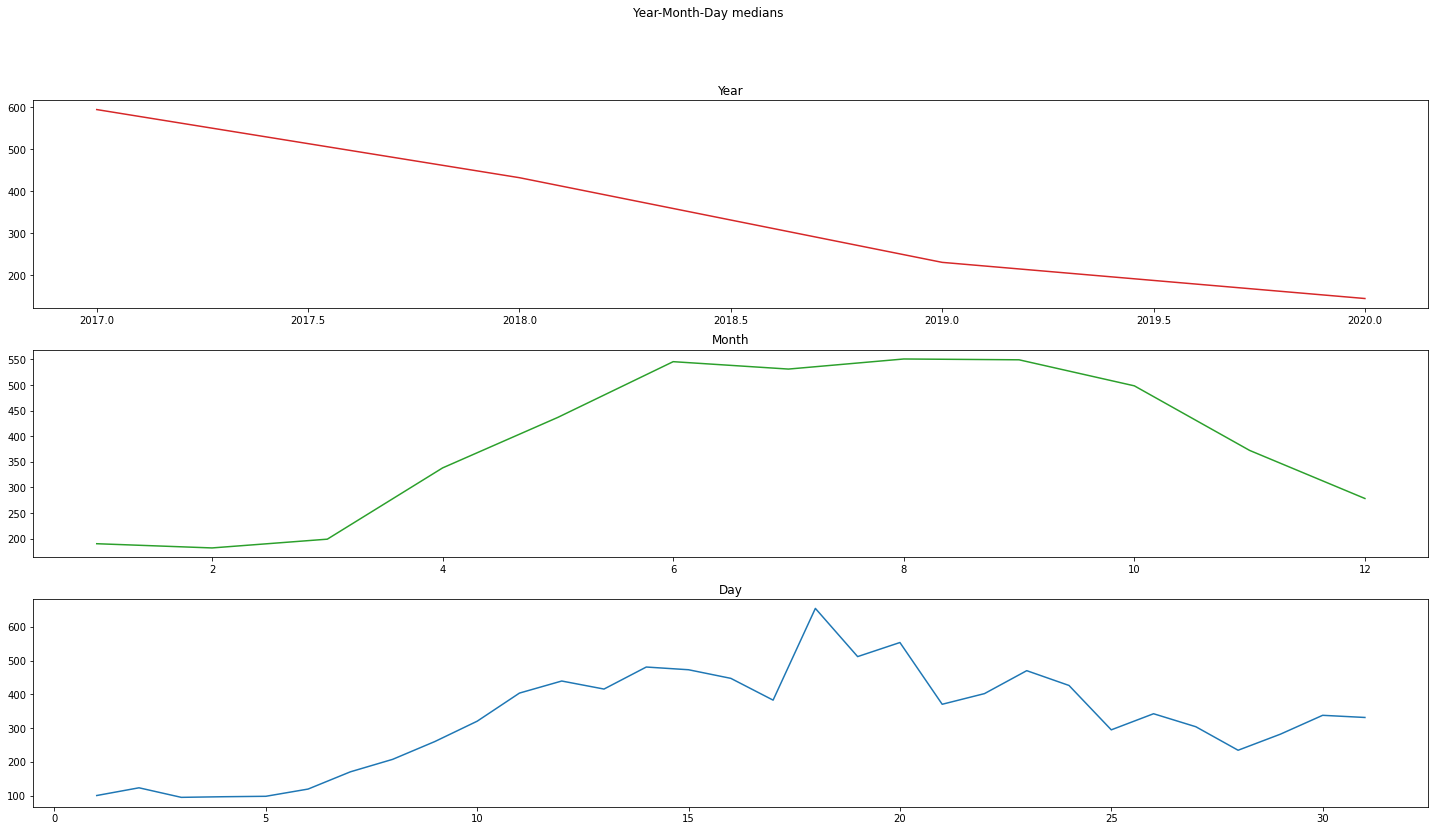

In [11]:
result5a = df.groupby('year')['consumption_unit'].aggregate(['median'])
result5b = df.groupby('month')['consumption_unit'].aggregate(['median'])
result5c = df.groupby('day')['consumption_unit'].aggregate(['median'])

result5a.head()
fig1, axs = plt.subplots(3, figsize=(25,13))
fig1.suptitle('Year-Month-Day medians')

axs[0].plot(result5a, 'tab:red')
axs[0].set_title('Year')
axs[1].plot(result5b, 'tab:green')
axs[1].set_title('Month')
axs[2].plot(result5c, 'tab:blue')
axs[2].set_title('Day')

Text(0.5, 1.0, '2020')

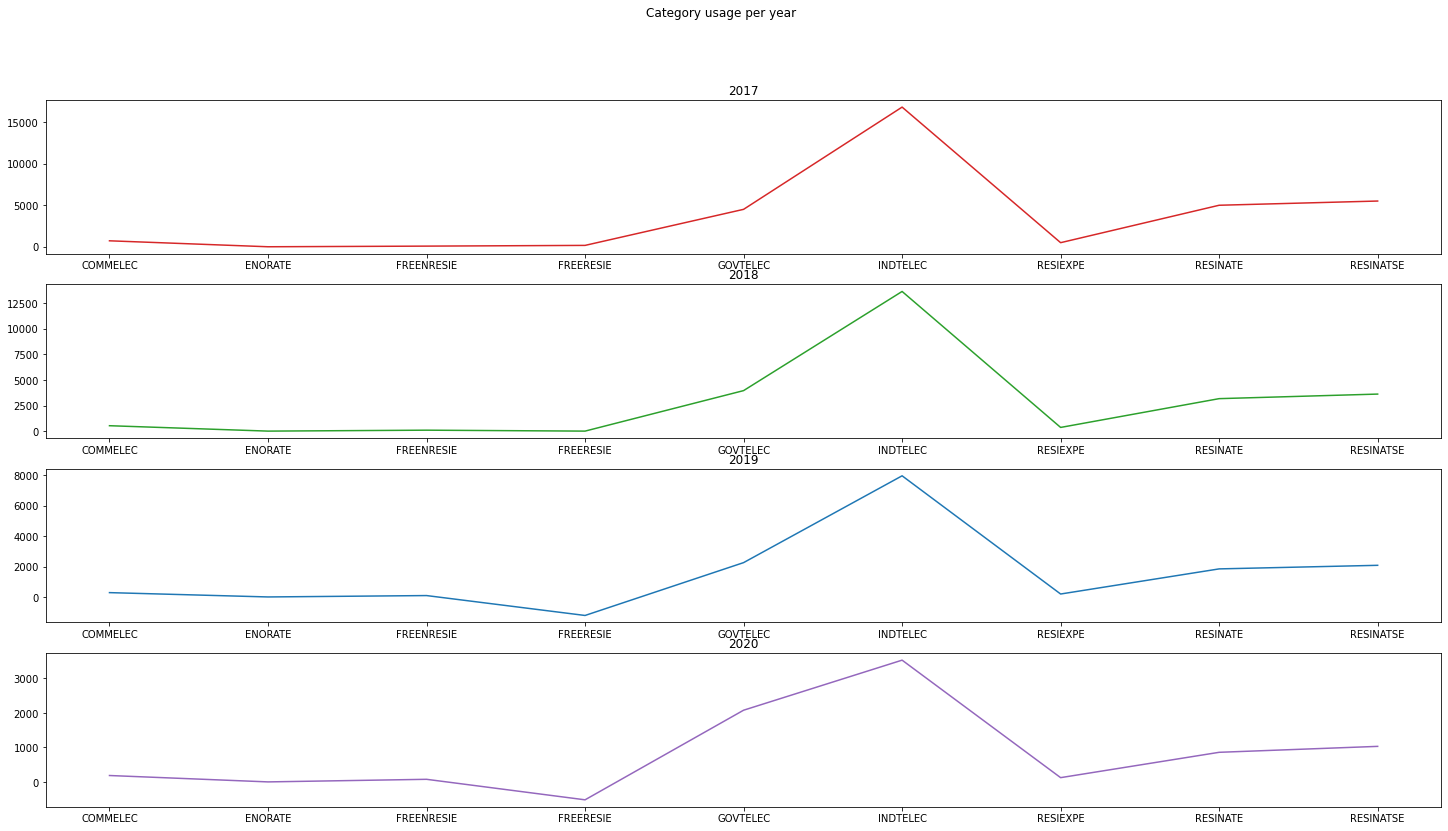

In [12]:
result6a = df[df['year'] == 2017.0].groupby(df['rate_category'])[['consumption_unit']].aggregate(['median'])
result6b = df[df['year'] == 2018.0].groupby(df['rate_category'])[['consumption_unit']].aggregate(['median'])
result6c = df[df['year'] == 2019.0].groupby(df['rate_category'])[['consumption_unit']].aggregate(['median'])
result6d = df[df['year'] == 2020.0].groupby(df['rate_category'])[['consumption_unit']].aggregate(['median'])

fig2, axs = plt.subplots(4, figsize=(25,13))
fig2.suptitle('Category usage per year')

axs[0].plot(result6a, 'tab:red')
axs[0].set_title('2017')

axs[1].plot(result6b, 'tab:green')
axs[1].set_title('2018')

axs[2].plot(result6c, 'tab:blue')
axs[2].set_title('2019')

axs[3].plot(result6d, 'tab:purple')
axs[3].set_title('2020')

Text(0.5, 1.0, '2020')

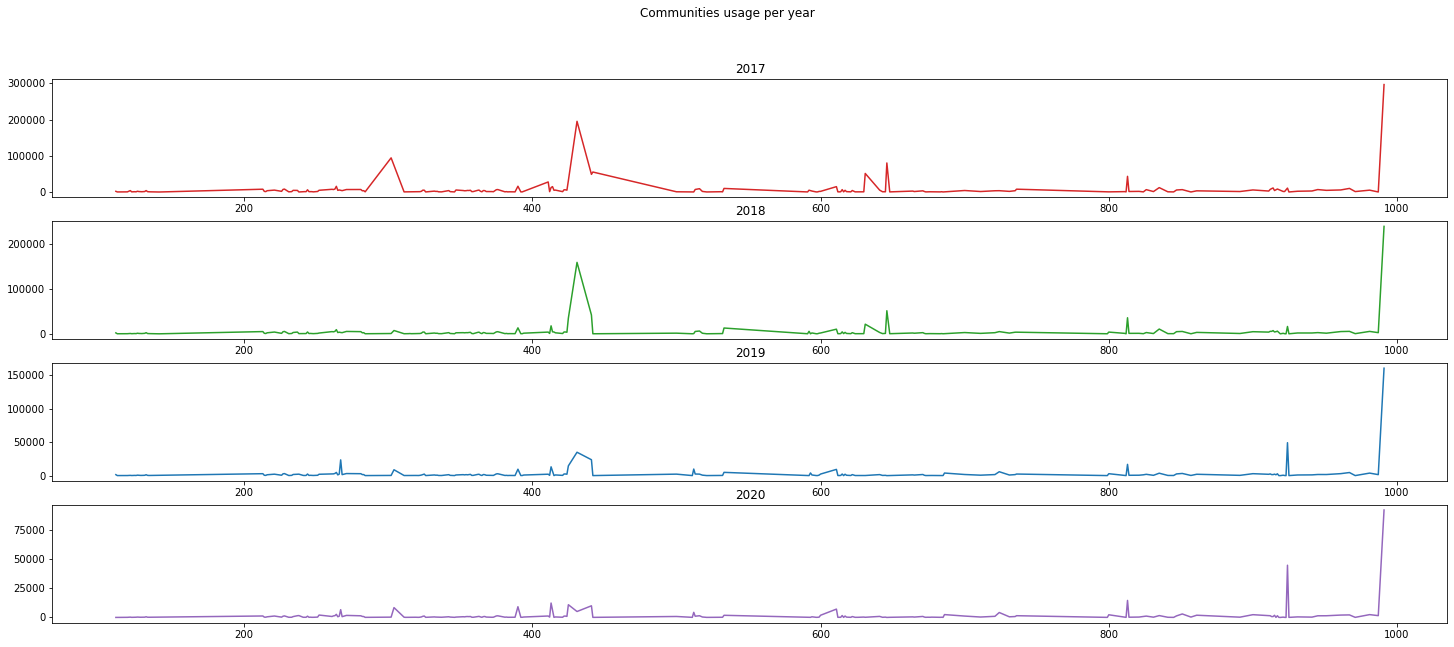

In [13]:
result7a = df[df['year'] == 2017.0].groupby(df['community'])[['consumption_unit']].aggregate(['median'])
result7b = df[df['year'] == 2018.0].groupby(df['community'])[['consumption_unit']].aggregate(['median'])
result7c = df[df['year'] == 2019.0].groupby(df['community'])[['consumption_unit']].aggregate(['median'])
result7d = df[df['year'] == 2020.0].groupby(df['community'])[['consumption_unit']].aggregate(['median'])

fig3, axs = plt.subplots(4, figsize=(25,10))
fig3.suptitle('Communities usage per year')

axs[0].plot(result7a, 'tab:red')
axs[0].set_title('2017')

axs[1].plot(result7b, 'tab:green')
axs[1].set_title('2018')

axs[2].plot(result7c, 'tab:blue')
axs[2].set_title('2019')

axs[3].plot(result7d, 'tab:purple')
axs[3].set_title('2020')

In [14]:
#1 Category/Community power consumption each year -DONE-
#2 Areas in each Category (most power hungry and complete data) -DONE-
#3 category =then=> area -DONE-
#4 Graph it -DONE-

In [15]:
df.head()

,Unnamed: 0.1,Unnamed: 0,community,rate_category,consumption_period,calendar_month,consumption_unit,billing_portion,consumption_periods,year,month,day
0,0,0,345.0,ENORATE,22.03.2017,201201,0.0,B28,2017-03-22,2017.0,3.0,22.0
1,1,1,345.0,ENORATE,22.03.2017,201202,0.0,B28,2017-03-22,2017.0,3.0,22.0
2,2,2,345.0,ENORATE,22.03.2017,201203,0.0,B28,2017-03-22,2017.0,3.0,22.0
3,3,3,345.0,ENORATE,22.03.2017,201204,0.0,B28,2017-03-22,2017.0,3.0,22.0
4,4,4,345.0,ENORATE,22.03.2017,201205,0.0,B28,2017-03-22,2017.0,3.0,22.0


In [16]:
result8 = df[['rate_category', 'community', 'consumption_unit']].groupby(['rate_category', 'community']).aggregate(['sum'])
result8.head()

consumption_unit
                                     sum
rate_category community                 
COMMELEC      111.0         1.134244e+08
              112.0         2.415321e+08
              113.0         2.919299e+08
              114.0         2.723620e+08
              115.0         1.279076e+08

<AxesSubplot:xlabel='community'>

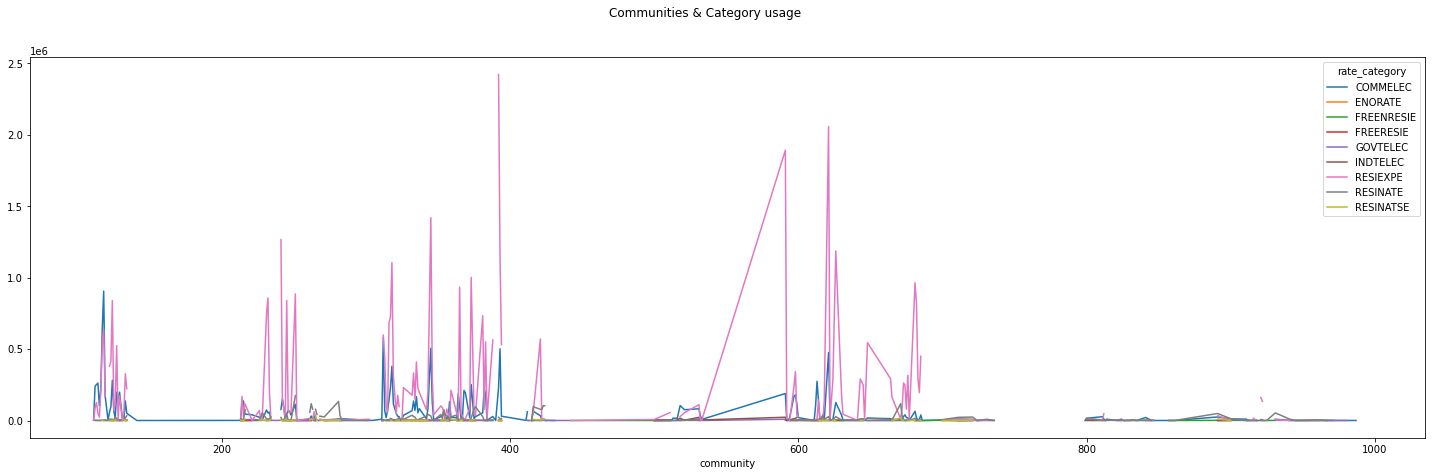

In [17]:
fig4, ax = plt.subplots(figsize=(25,7))
fig4.suptitle('Communities & Category usage')
df.groupby(['community','rate_category']).count()['consumption_unit'].unstack().plot(ax=ax)

<AxesSubplot:ylabel='Frequency'>

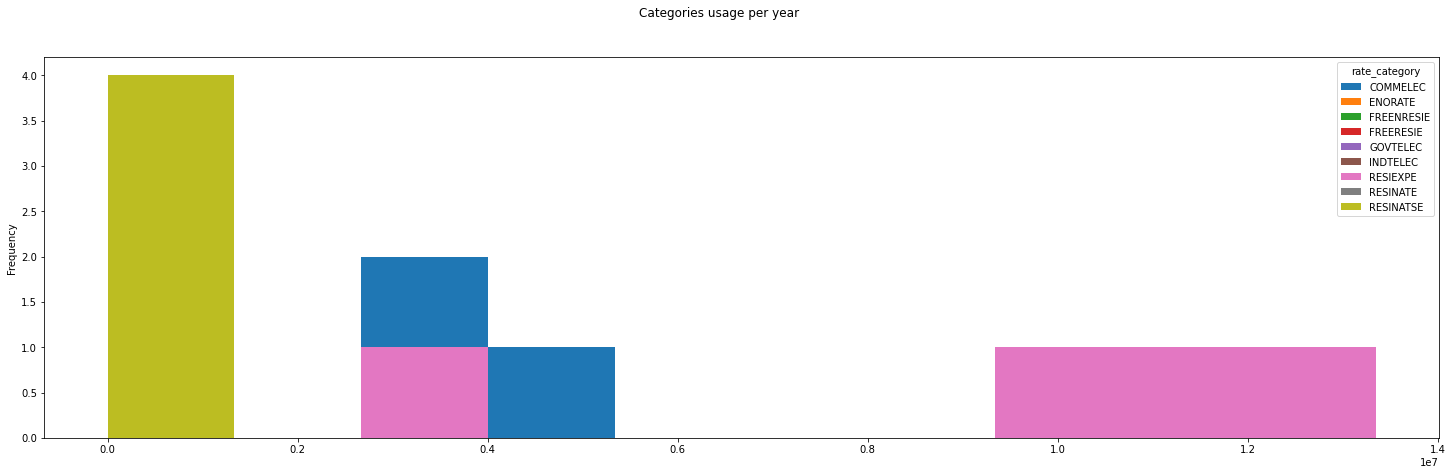

In [18]:
fig5, ax = plt.subplots(figsize=(25,7))
fig5.suptitle('Categories usage per year')
df.groupby(['year','rate_category']).count()['consumption_unit'].unstack().plot(kind='hist', ax=ax)

<AxesSubplot:ylabel='Frequency'>

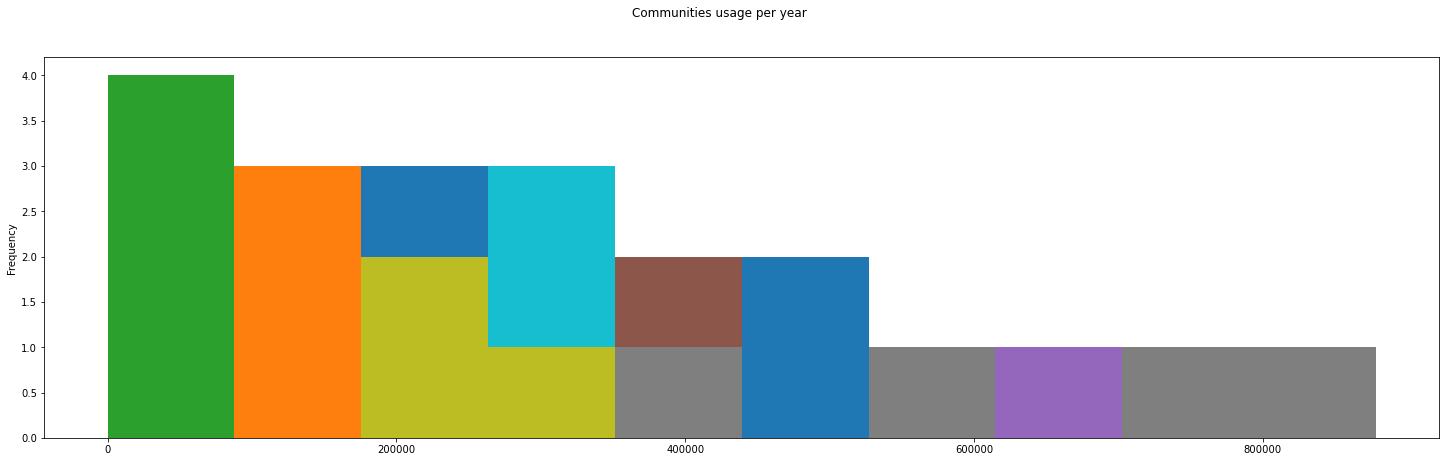

In [19]:
fig6, ax = plt.subplots(figsize=(25,7))
fig6.suptitle('Communities usage per year')
df.groupby(['year','community']).count()['consumption_unit'].unstack().plot(kind='hist', ax=ax, legend=None)

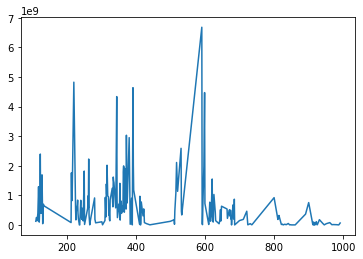

In [20]:
#result10a = df[['rate_category', 'community', 'consumption_unit']].groupby(['rate_category', 'community']).aggregate(['sum'])
#print(df['consumption_unit'].mean())
result10b = df[df['consumption_unit'] > 2864].groupby(df['community'])[['consumption_unit']].aggregate(['sum'])
result10b.head()
plt.plot(result10b)

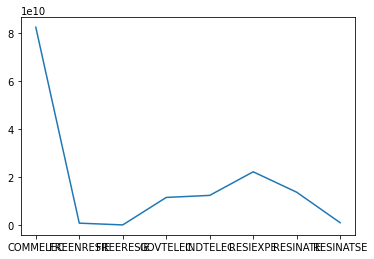

In [21]:
#result11a = df[['rate_category', 'community', 'consumption_unit']].groupby(['rate_category', 'community']).aggregate(['sum'])
#print(df['consumption_unit'].mean())
result11b = df[df['consumption_unit'] > 2864].groupby(df['rate_category'])[['consumption_unit']].aggregate(['sum'])
result11b.head()
plt.plot(result11b)

<AxesSubplot:xlabel='community'>

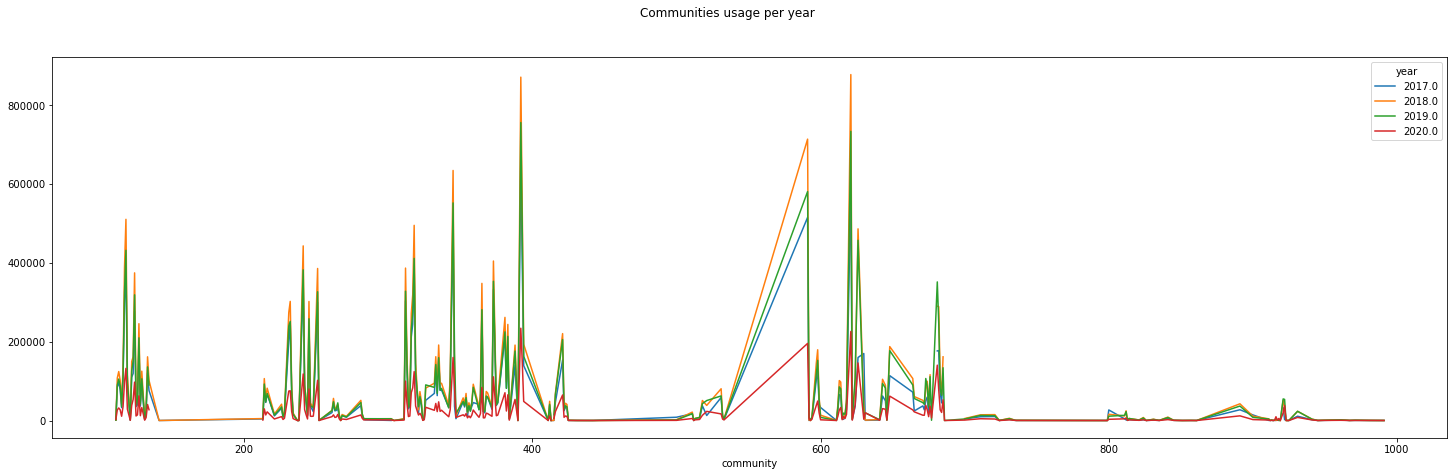

In [22]:
fig7, ax = plt.subplots(figsize=(25,7))
fig7.suptitle('Communities usage per year')
df.groupby(['community','year']).count()['consumption_unit'].unstack().plot(ax=ax)

<AxesSubplot:xlabel='rate_category'>

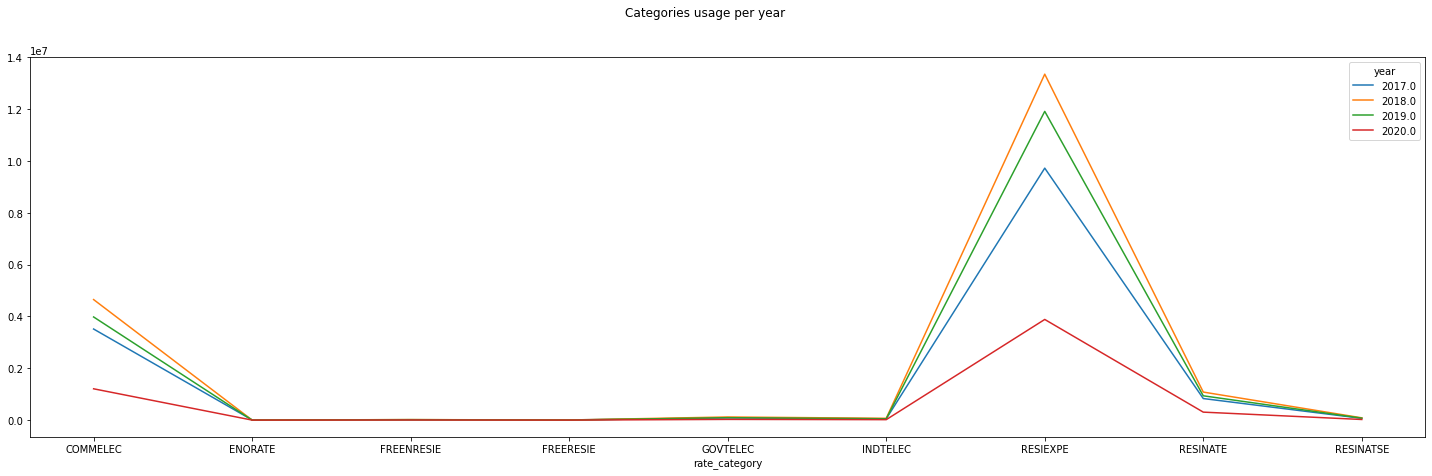

In [23]:
fig8, ax = plt.subplots(figsize=(25,7))
fig8.suptitle('Categories usage per year')
df.groupby(['rate_category','year']).count()['consumption_unit'].unstack().plot(ax=ax)

In [24]:
df['percentage'] = df['consumption_unit']/df['consumption_unit'].sum()*100
result12 = df[['rate_category', 'community', 'percentage']].groupby(['rate_category', 'community']).aggregate(['sum'])
result12.head()

percentage
                               sum
rate_category community           
COMMELEC      111.0       0.066369
              112.0       0.141329
              113.0       0.170818
              114.0       0.159368
              115.0       0.074843

                     sum
rate_category           
COMMELEC       51.813404
ENORATE         0.000000
FREENRESIE      0.476610
FREERESIE       0.048427
GOVTELEC        6.849812
INDTELEC        7.280761
RESIEXPE       23.644389
RESINATE        9.193001
RESINATSE       0.693596


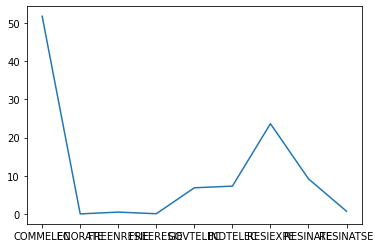

In [25]:
result13 = df.groupby('rate_category')['percentage'].aggregate(['sum'])
print(result13)
plt.plot(result13)

                sum
community          
111.0      0.072835
112.0      0.186368
113.0      0.233920
114.0      0.183668
115.0      0.112178
...             ...
967.0      0.004585
971.0      0.007188
981.0      0.004556
987.0      0.000177
991.0      0.037753

[233 rows x 1 columns]


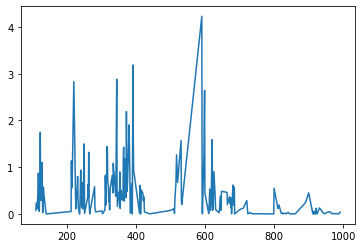

In [26]:
result13 = df.groupby('community')['percentage'].aggregate(['sum'])
print(result13)
plt.plot(result13)

Text(0.5, 1.0, '2020')

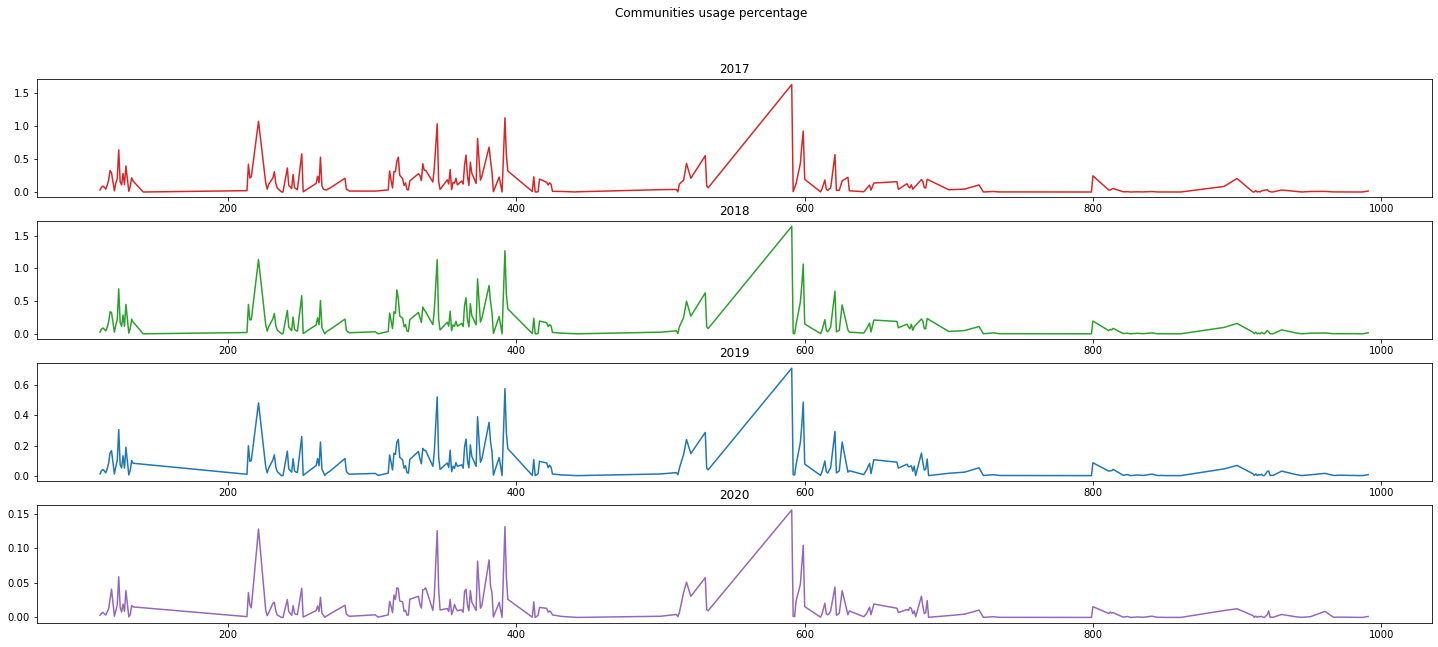

In [27]:
result14a = df[df['year'] == 2017.0].groupby(df['community'])[['percentage']].aggregate(['sum'])
result14b = df[df['year'] == 2018.0].groupby(df['community'])[['percentage']].aggregate(['sum'])
result14c = df[df['year'] == 2019.0].groupby(df['community'])[['percentage']].aggregate(['sum'])
result14d = df[df['year'] == 2020.0].groupby(df['community'])[['percentage']].aggregate(['sum'])

fig9, axs = plt.subplots(4, figsize=(25,10))
fig9.suptitle('Communities usage percentage')

axs[0].plot(result14a, 'tab:red')
axs[0].set_title('2017')

axs[1].plot(result14b, 'tab:green')
axs[1].set_title('2018')

axs[2].plot(result14c, 'tab:blue')
axs[2].set_title('2019')

axs[3].plot(result14d, 'tab:purple')
axs[3].set_title('2020')

Text(0.5, 1.0, '2020')

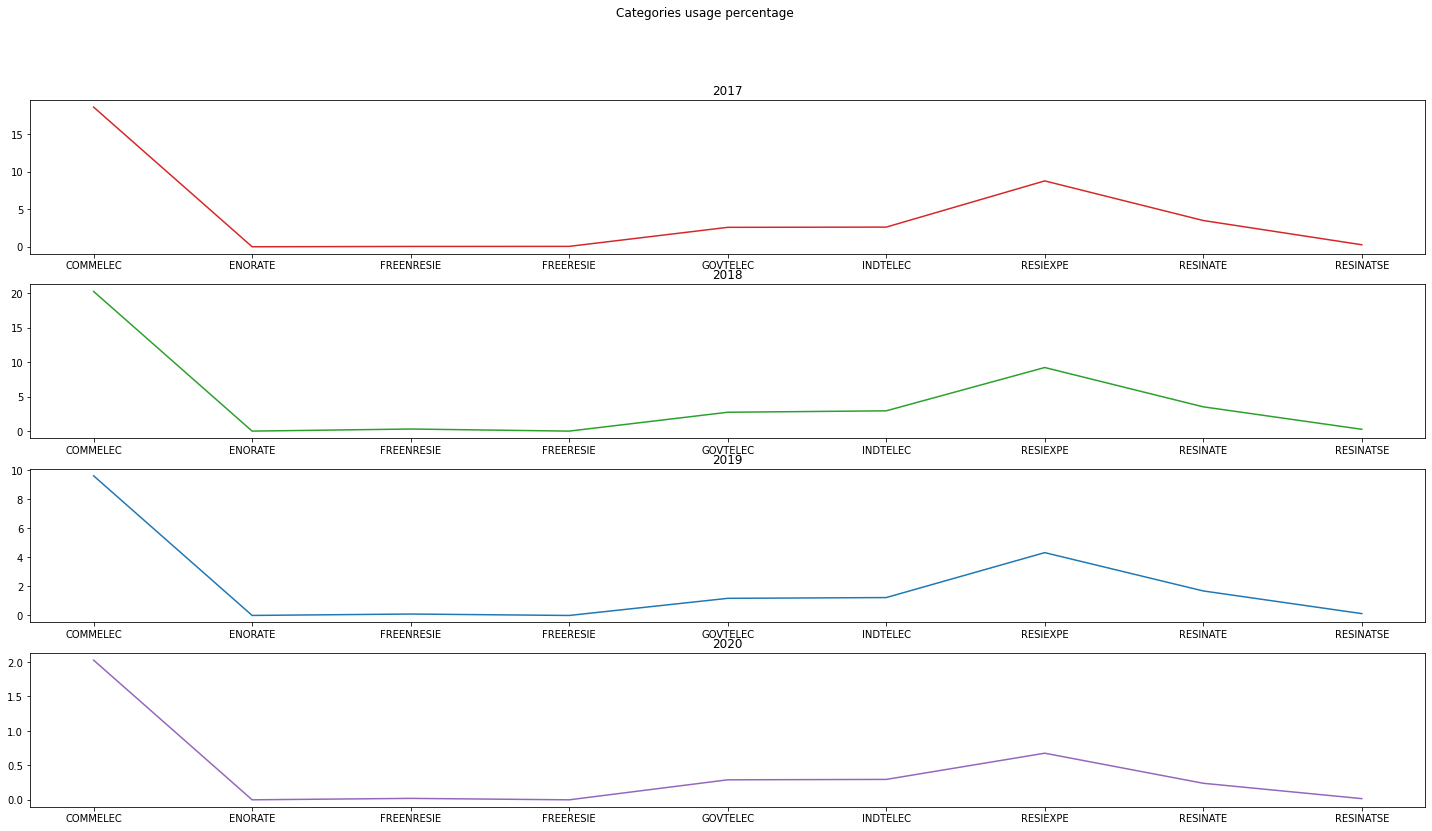

In [28]:
result15a = df[df['year'] == 2017.0].groupby(df['rate_category'])[['percentage']].aggregate(['sum'])
result15b = df[df['year'] == 2018.0].groupby(df['rate_category'])[['percentage']].aggregate(['sum'])
result15c = df[df['year'] == 2019.0].groupby(df['rate_category'])[['percentage']].aggregate(['sum'])
result15d = df[df['year'] == 2020.0].groupby(df['rate_category'])[['percentage']].aggregate(['sum'])

fig9, axs = plt.subplots(4, figsize=(25,13))
fig9.suptitle('Categories usage percentage')

axs[0].plot(result15a, 'tab:red')
axs[0].set_title('2017')

axs[1].plot(result15b, 'tab:green')
axs[1].set_title('2018')

axs[2].plot(result15c, 'tab:blue')
axs[2].set_title('2019')

axs[3].plot(result15d, 'tab:purple')
axs[3].set_title('2020')

Text(0.5, 1.0, 'Day')

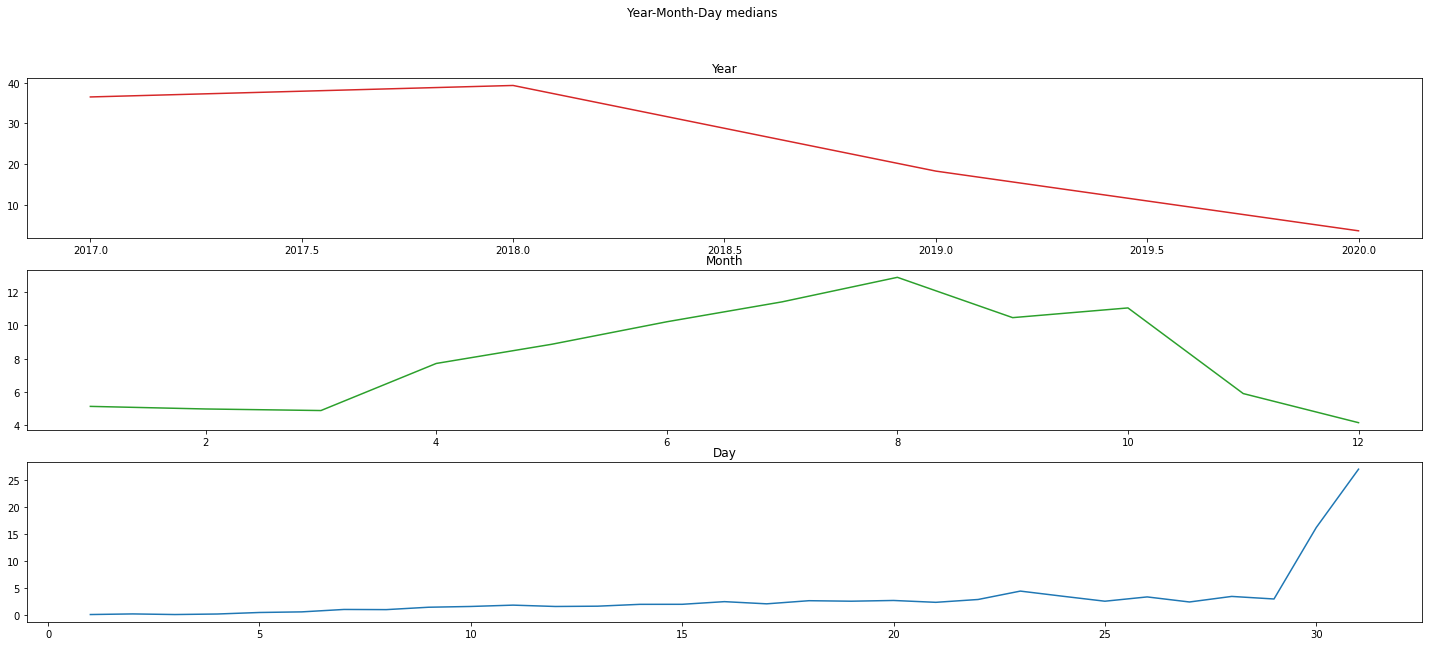

In [29]:
result16a = df.groupby('year')['percentage'].aggregate(['sum'])
result16b = df.groupby('month')['percentage'].aggregate(['sum'])
result16c = df.groupby('day')['percentage'].aggregate(['sum'])

result16a.head()
fig10, axs = plt.subplots(3, figsize=(25,10))
fig10.suptitle('Year-Month-Day medians')

axs[0].plot(result16a, 'tab:red')
axs[0].set_title('Year')
axs[1].plot(result16b, 'tab:green')
axs[1].set_title('Month')
axs[2].plot(result16c, 'tab:blue')
axs[2].set_title('Day')

In [30]:
result17 = df.groupby('rate_category')['percentage'].aggregate(['sum'])
print(result17)

                     sum
rate_category           
COMMELEC       51.813404
ENORATE         0.000000
FREENRESIE      0.476610
FREERESIE       0.048427
GOVTELEC        6.849812
INDTELEC        7.280761
RESIEXPE       23.644389
RESINATE        9.193001
RESINATSE       0.693596


In [31]:
#1 community usage per category (industrial's areas usages) -DONE-
#2 https://github.com/allentran/pca-magic   -DONE-

rate_category
COMMELEC      AxesSubplot(0.125,0.125;0.775x0.755)
ENORATE       AxesSubplot(0.125,0.125;0.775x0.755)
FREENRESIE    AxesSubplot(0.125,0.125;0.775x0.755)
FREERESIE     AxesSubplot(0.125,0.125;0.775x0.755)
GOVTELEC      AxesSubplot(0.125,0.125;0.775x0.755)
INDTELEC      AxesSubplot(0.125,0.125;0.775x0.755)
RESIEXPE      AxesSubplot(0.125,0.125;0.775x0.755)
RESINATE      AxesSubplot(0.125,0.125;0.775x0.755)
RESINATSE     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

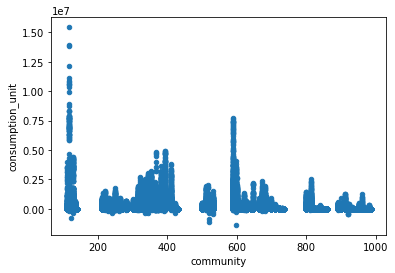

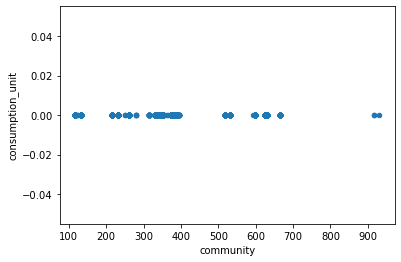

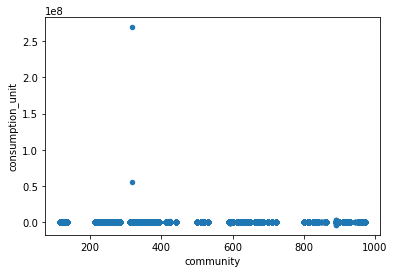

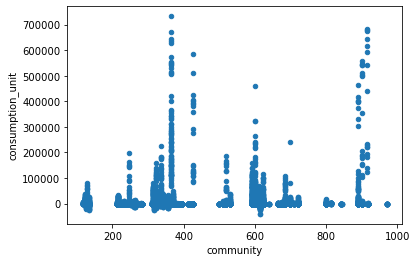

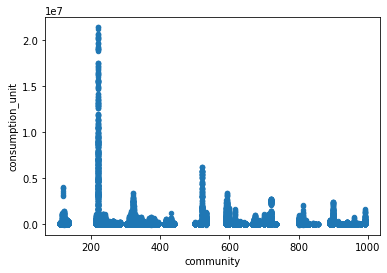

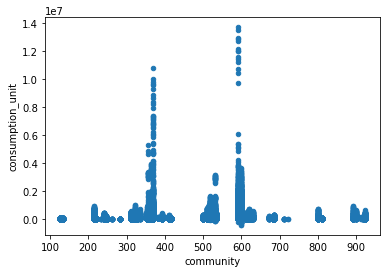

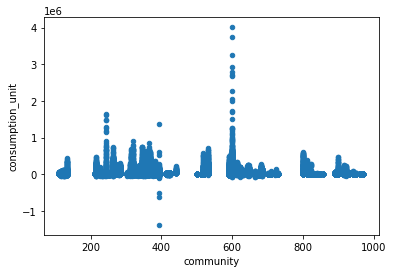

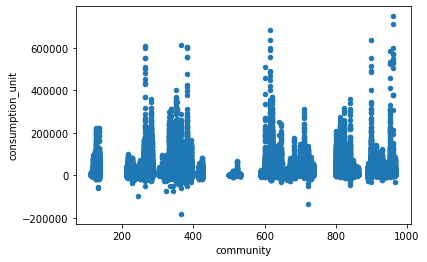

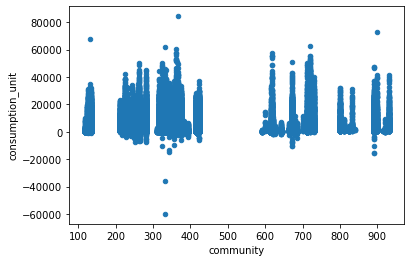

In [32]:
df.groupby('rate_category').plot(x='community', y='consumption_unit', kind='scatter')
# Get the sum <---

<AxesSubplot:ylabel='sum'>

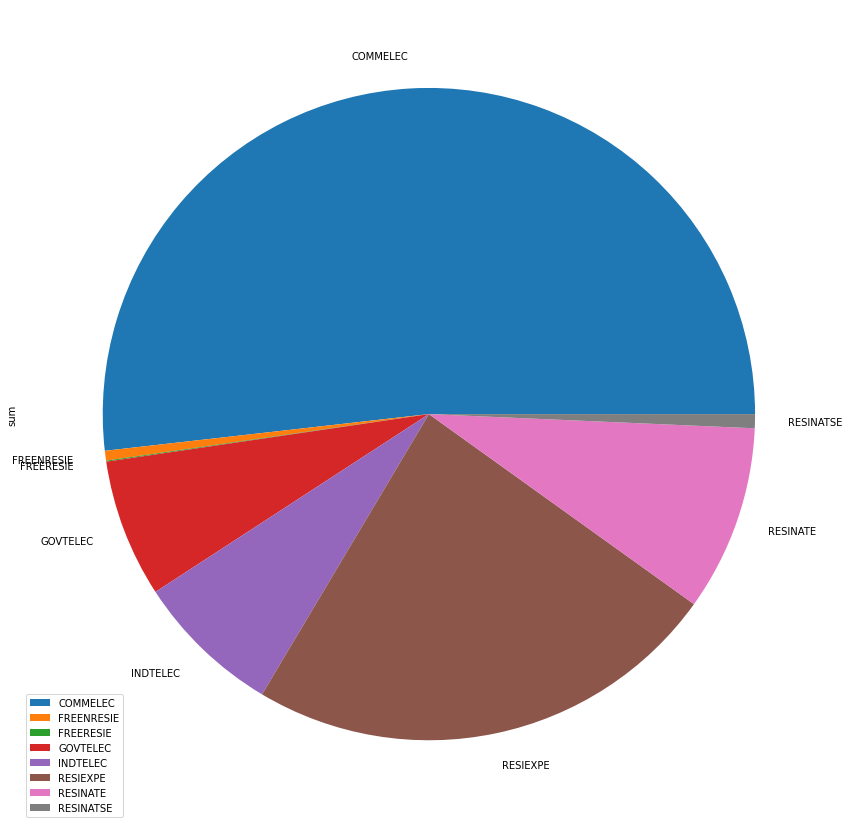

In [48]:
applepie = df[df['consumption_unit'] > 0].groupby(df['rate_category'])[['consumption_unit']].aggregate(['sum'])
applepie.head()
applepie.plot.pie(y='consumption_unit', figsize=(15,15))

In [ ]:
# Community distribution over the years
# Distribution of category over months 

In [ ]:
#abdulla
# Get the accumilated data for each month per category (instead of years)